This notebook summarizes the impact of excluding wall material from the housing indicator on MPI 2005.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
datafd_path = code_path.parent.parent / 'data' / 'MPI'
outfd_path = code_path.parent.parent / 'output'

### khm dhs05

#### read in MPI 

##### harmonized with 10 and 14

In [2]:
survey = 'khm_dhs05_cot'
spatial_res = 'clust'
df = pd.read_csv(outfd_path / 'data' / f'mpi_{survey}_{spatial_res}_CI_mis.csv')

##### harmonized with 10 and 14, wall material excluded 

In [3]:
survey = 'khm_dhs05_cot_nowall'
spatial_res = 'clust'
df_nowall = pd.read_csv(outfd_path / 'data' / f'mpi_{survey}_{spatial_res}_CI_mis.csv')

#### compare

##### same except for MPI

In [4]:
df.columns

Index(['clust_no', 'mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI', 'tot_samp_ppl',
       'pct_samp_ppl_mis'],
      dtype='object')

In [5]:
df_nowall.columns

Index(['clust_no', 'mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI', 'tot_samp_ppl',
       'pct_samp_ppl_mis'],
      dtype='object')

In [6]:
df_bulk = df.drop(columns=['mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI'])
df_nowall_bulk = df_nowall.drop(columns=['mpi', 'mpi_SE', 'mpi_lo95CI', 'mpi_up95CI'])

In [7]:
pd.testing.assert_frame_equal(df_bulk, df_nowall_bulk)

##### difference in MPI

<AxesSubplot:>

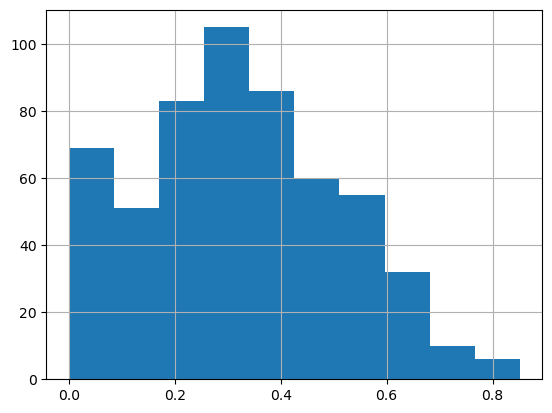

In [8]:
df.mpi.hist()

<AxesSubplot:>

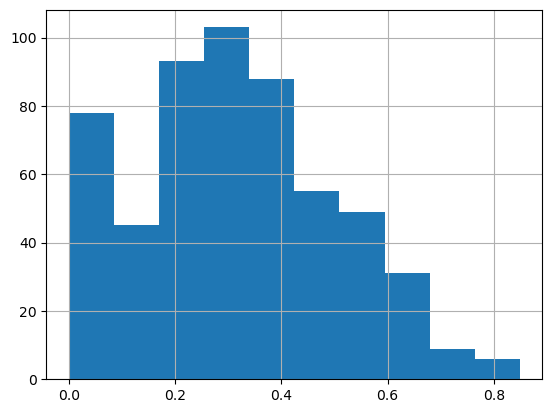

In [9]:
df_nowall.mpi.hist()

In [10]:
mpi_loss = df.mpi - df_nowall.mpi

In [11]:
(mpi_loss == 0).mean()  # 39% clusters' MPI not impacted at all

0.3877917414721723

In [12]:
(mpi_loss < 0).mean()  # no cluster sees MPI gain

0.0

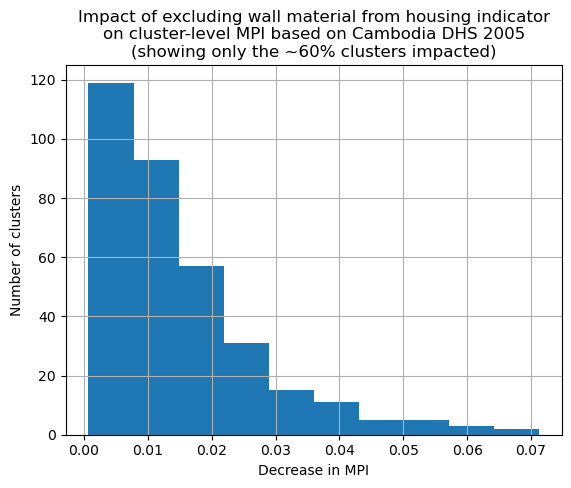

In [13]:
(mpi_loss[mpi_loss > 0]).hist()
plt.xlabel('Decrease in MPI')
plt.ylabel('Number of clusters')
plt.title('Impact of excluding wall material from housing indicator\non cluster-level MPI based on Cambodia DHS 2005\n(showing only the ~60% clusters impacted)')
plt.show()